# Exploring Glider Line 67.2 #
### Patrick Daniel - PhD Student - UCSC ###
### Coast Watch Satellite Course 2022 ###

Downloaded through the IOOS Glider Map ERDDAP data portal in the form of a CSV file.

Gliders make sawtooth profiles that return to the nearsurface (~1-2 meters).

1. Get the Lat/Lon of Glider when it is at/near the surface of a profile.
2. Calculate the distance from deployment at each coordinate
3. Plot subsurface
4. Get Satellite Data
5. Make Plots and Maps

In [52]:
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cmocean
import seaborn as sns
import xarray as xr
import numpy as np

__Get Glider Data__

In [253]:
glider_url = "https://gliders.ioos.us/erddap/tabledap/sp025-20211208T2324.csv?trajectory%2Cwmo_id%2Cprofile_id%2Ctime%2Clatitude%2Clongitude%2Cdepth%2Cchlorophyll_a%2Cchlorophyll_a_qc%2Cconductivity%2Cconductivity_qc%2Cdensity%2Cdensity_qc%2Cdepth_qc%2Cdissolved_oxygen%2Cdissolved_oxygen_qc%2Cinstrument_ctd%2Cinstrument_doxy%2Cinstrument_fchl%2Clat_qc%2Clat_uv%2Clat_uv_qc%2Clatitude_qc%2Clon_qc%2Clon_uv%2Clon_uv_qc%2Clongitude_qc%2Cplatform_meta%2Cprecise_lat%2Cprecise_lat_qc%2Cprecise_lon%2Cprecise_lon_qc%2Cprecise_time%2Cprecise_time_qc%2Cpressure%2Cpressure_qc%2Csalinity%2Csalinity_qc%2Ctemperature%2Ctemperature_qc%2Ctime_qc%2Ctime_uv%2Ctime_uv_qc%2Cu%2Cu_qc%2Cv%2Cv_qc"
df = pd.read_csv(glider_url, skiprows=[1])

df['dateTime'] = pd.to_datetime(df['time'])
df['iso_date'] = df.dateTime.dt.strftime('%Y-%m-%d')
df.head()

trajectory   wmo_id  profile_id                  time   latitude  \
0  sp025-20211208T2324  4801900           2  2021-12-09T01:05:45Z  36.789075   
1  sp025-20211208T2324  4801900           2  2021-12-09T01:05:45Z  36.789075   
2  sp025-20211208T2324  4801900           2  2021-12-09T01:05:45Z  36.789075   
3  sp025-20211208T2324  4801900           2  2021-12-09T01:05:45Z  36.789075   
4  sp025-20211208T2324  4801900           2  2021-12-09T01:05:45Z  36.789075   

    longitude      depth  chlorophyll_a  chlorophyll_a_qc  conductivity  ...  \
0 -121.851425        NaN            NaN                 9           NaN  ...   
1 -121.851425  107.96904          0.219                 1      3.741041  ...   
2 -121.851425  107.69125          0.216                 1      3.741582  ...   
3 -121.851425  107.21504          0.213                 1      3.741800  ...   
4 -121.851425  106.58009          0.210                 1      3.741801  ...   

   temperature_qc  time_qc               time_uv  time_uv_qc         u  u_qc  \
0               9        0  2021-12-09T00:52:30Z           0  0.105019     0   
1               1        0  2021-12-09T00:52:30Z           0  0.105019     0   
2               1        0  2021-12-09T00:52:30Z           0  0.105019     0   
3               1        0  2021-12-09T00:52:30Z           0  0.105019     0   
4               1        0  2021-12-09T00:52:30Z           0  0.105019     0   

          v  v_qc                  dateTime    iso_date  
0 -0.070565     0 2021-12-09 01:05:45+00:00  2021-12-09  
1 -0.070565     0 2021-12-09 01:05:45+00:00  2021-12-09  
2 -0.070565     0 2021-12-09 01:05:45+00:00  2021-12-09  
3 -0.070565     0 2021-12-09 01:05:45+00:00  2021-12-09  
4 -0.070565     0 2021-12-09 01:05:45+00:00  2021-12-09  

[5 rows x 49 columns]

In [256]:
# Surface values for each profile
df_top = df.groupby('profile_id').last().iloc[1:].reset_index(drop=True)
df_top.head()

trajectory   wmo_id                  time   latitude   longitude  \
0  sp025-20211208T2324  4801900  2021-12-09T02:16:00Z  36.789075 -121.857600   
1  sp025-20211208T2324  4801900  2021-12-09T03:38:00Z  36.789100 -121.868200   
2  sp025-20211208T2324  4801900  2021-12-09T05:23:45Z  36.790225 -121.883950   
3  sp025-20211208T2324  4801900  2021-12-09T07:35:30Z  36.791200 -121.905375   
4  sp025-20211208T2324  4801900  2021-12-09T09:57:00Z  36.785575 -121.928150   

      depth  chlorophyll_a  chlorophyll_a_qc  conductivity  conductivity_qc  \
0  1.985239          0.942                 9      3.930731                9   
1  1.985239          0.957                 9      3.929635                9   
2  2.104353          0.834                 9      3.911728                9   
3  2.144057          0.690                 9      3.902167                9   
4  1.230851          0.600                 9      3.922527                9   

   ...  temperature_qc  time_qc               time_uv  time_uv_qc         u  \
0  ...               9        0  2021-12-09T01:58:00Z           0  0.022259   
1  ...               9        0  2021-12-09T03:18:00Z           0 -0.012870   
2  ...               9        0  2021-12-09T04:56:30Z           0 -0.010474   
3  ...               9        0  2021-12-09T07:02:00Z           0  0.017067   
4  ...               9        0  2021-12-09T09:23:00Z           0  0.026865   

   u_qc         v  v_qc                  dateTime    iso_date  
0     0 -0.097764     0 2021-12-09 02:16:00+00:00  2021-12-09  
1     0 -0.098640     0 2021-12-09 03:38:00+00:00  2021-12-09  
2     0 -0.071861     0 2021-12-09 05:23:45+00:00  2021-12-09  
3     0 -0.040475     0 2021-12-09 07:35:30+00:00  2021-12-09  
4     0 -0.057338     0 2021-12-09 09:57:00+00:00  2021-12-09  

[5 rows x 48 columns]

__Calculate the distance from deployment at each coordinate__

Distance betwen coordinates can be calculated using the haversine method.  
This code was poached from: https://colab.research.google.com/github/dlsun/pods/blob/master/12-Geospatial-Data/12.1%20Map%20Projections%20and%20Distance%20Metrics.ipynb#scrollTo=jrHaTw9Uzw8e 

In [257]:
# Mean radius of the earth (in km)
EARTH_RADIUS = 6371.009

def haversine(point1, point2):
    """
    Calculate the great circle distance between two points
    on the Earth, specified as (lon, lat), where lon and lat
    are in degrees.
    
    Returns: distance between points in km
    """
    # convert decimal degrees to radians
    lon1, lat1 = [np.radians(x) for x in point1]
    lon2, lat2 = [np.radians(x) for x in point2]

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    return 2 * EARTH_RADIUS * np.arcsin(np.sqrt(a))

In [259]:
# Calculate Distance from Deployment Locations
lons = df_top['longitude'].values
lats = df_top['latitude'].values
loc_0 = lons[0],lats[0] # Deployment locations

df_top['distance'] = [haversine(loc_0, loc) for loc in zip(lons,lats)]

Text(0.5, 1.0, 'Distance from deployment Locations in km')

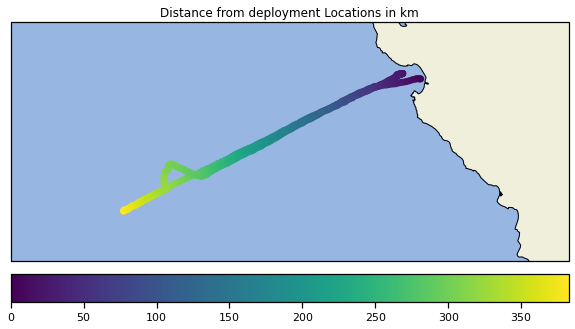

In [264]:
## Sanity Map
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
fig.set_size_inches(10,8)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
cax = ax.scatter(df_top['longitude'], df_top['latitude'],c=df_top['distance'])
ax.set_xlim(-127,-120)
ax.set_ylim(34.5,37.5)
plt.colorbar(cax,location='bottom',pad=.03)
plt.title("Distance from deployment Locations in km")

### 3. Plot subsurface Variables ###
- Temp
- Density
- Chlorophyll-a

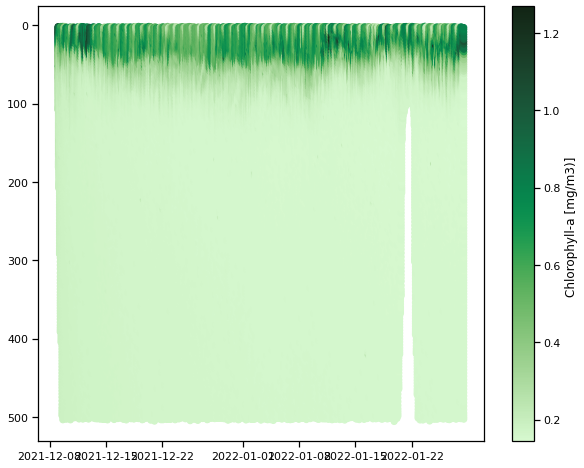

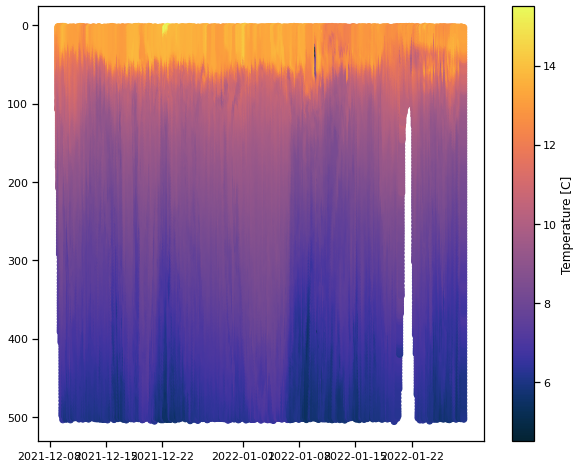

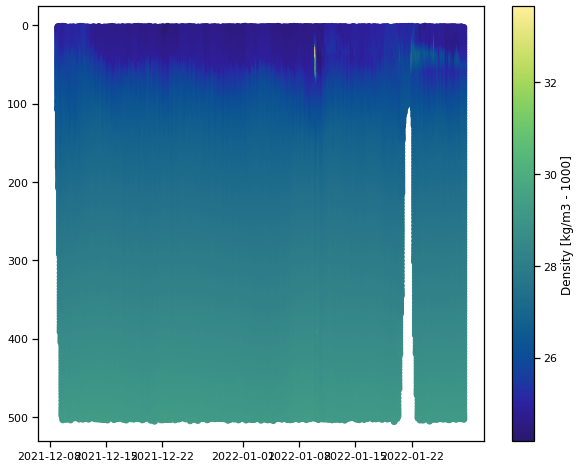

In [274]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
cax = ax.scatter(df['dateTime'],df['depth'],c=df['chlorophyll_a'],cmap=cmocean.cm.algae,)
plt.colorbar(cax,label='Chlorophyll-a [mg/m3)] ')
ax.invert_yaxis()

fig, ax = plt.subplots()
fig.set_size_inches(10,8)
cax = ax.scatter(df['dateTime'],df['depth'],c=df['temperature'],cmap=cmocean.cm.thermal,)
plt.colorbar(cax,label='Temperature [C]')
ax.invert_yaxis()

fig, ax = plt.subplots()
fig.set_size_inches(10,8)
cax = ax.scatter(df['dateTime'],df['depth'],c=df['density']-1000,cmap=cmocean.cm.haline,)
plt.colorbar(cax,label='Density [kg/m3 - 1000]')
ax.invert_yaxis()

### 4. Get Satellite Data ###
Using some of the example code from https://github.com/CoastWatch-WestCoast/python_code/blob/satellite_course_jan_2022/extract_track.ipynb

__Data Sources:___  
__NOAA GeoPolar__  
__Modis-Aqua__  
__NASA MUR__  

In [11]:
def point_to_dataset(dataset_id, base_url='https://coastwatch.pfeg.noaa.gov/erddap/griddap'):
    base_url = base_url.rstrip('/')
    full_url = '/'.join([base_url, dataset_id])
    return xr.open_dataset(full_url)

def get_data(my_da, my_var,
             my_lt_min, my_lt_max, 
             my_ln_min, my_ln_max, 
             my_tm_min, my_tm_max
            ):
    
    my_data = my_da[my_var].sel(
                                latitude=slice(my_lt_min, my_lt_max), 
                                longitude=slice(my_ln_min, my_ln_max), 
                                time=slice(my_tm_min, my_tm_max)
                               )
    return my_data

def data_box(st_lat, st_lon, lat_res, lon_res, lat_pixels = 1, lon_pixels = 1):
    
    lt_min = st_lat - lat_res * lat_pixels
    lt_max = st_lat + lat_res * lat_pixels
    ln_min = st_lon - lon_res * lon_pixels
    ln_max = st_lon + lon_res * lon_pixels

    return lt_min, lt_max, ln_min, ln_max

def is_it_180_to_180(dataset_lon, location_lon):
    datasat_is = np.any((dataset_lon < 0))
    location_is = np.any((location_lon < 0))
    if datasat_is and location_is:
        return location_lon    
    elif not datasat_is and location_is:
        return [ x if x>0 else x+360 for x in location_lon ]
    elif datasat_is and not location_is:
        return [ x if x<=180 else x-360 for x in location_lon ]

In [275]:
da = point_to_dataset('nesdisGeoPolarSSTN5SQNRT') # erdMBsstd1day
[ df_top['lat_min'], df_top['lat_max'],
 df_top['lon_min'], df_top['lon_max'] ] = data_box(df_top['latitude'],df_top['longitude'],da.geospatial_lat_resolution,da.geospatial_lon_resolution,1,1)

In [276]:
means = []
stdevs = []
ns = []
my_var = 'analysed_sst'

for index, row in df_top.iterrows():
    my_data = get_data(da, my_var,
                       row['lat_min'], row['lat_max'], 
                       row['lon_min'], row['lon_max'], 
                       row['iso_date'], row['iso_date']
                      )
    
    means.append(np.nanmean(my_data, axis=(1,2))[0])
    stdevs.append(np.nanstd(my_data, axis=(1,2))[0])
    ns.append(np.count_nonzero(my_data, axis=(1,2))[0])
    if index % 25 == 0:
        print(f"{index} down, {len(df_top)} to go!")


0 down, 462 to go!
25 down, 462 to go!
50 down, 462 to go!
75 down, 462 to go!
100 down, 462 to go!
125 down, 462 to go!
150 down, 462 to go!
175 down, 462 to go!
200 down, 462 to go!
225 down, 462 to go!
250 down, 462 to go!
275 down, 462 to go!
300 down, 462 to go!
325 down, 462 to go!
350 down, 462 to go!
375 down, 462 to go!
400 down, 462 to go!
425 down, 462 to go!


IndexError: index 0 is out of bounds for axis 0 with size 0

In [45]:
df_top['sst_mean'] = means
df_top['sst_std'] = stdevs

In [51]:
## Basic Statistics
X = df_top["temperature"]
y = df_top["sst_mean"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               sst_mean   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          6.735e+05
Date:                Thu, 27 Jan 2022   Prob (F-statistic):                        0.00
Time:                        15:39:07   Log-Likelihood:                         -144.56
No. Observations:                 440   AIC:                                      291.1
Df Residuals:                     439   BIC:                                      295.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature     0.9947      0.001    820.682      0.000       0.992       0.997
==============================================================================
Omnibus:                        2.512   Durbin-Watson:                   0.428
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                2.376
Skew:                           0.179   Prob(JB):                        0.305
Kurtosis:                       3.046   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Aqua Modis ##

In [83]:
df_top['lon_corrected'] = is_it_180_to_180(da['longitude'], df_top['longitude'])

In [84]:
da = point_to_dataset('erdMBsstd1day') # erdMBsstd1day
[ df_top['lat_min'], df_top['lat_max'], df_top['lon_min'], df_top['lon_max'] ] = data_box(df_top['latitude'],df_top['lon_corrected'],da.geospatial_lat_resolution,da.geospatial_lon_resolution,1,1)
da

<xarray.Dataset>
Dimensions:    (time: 5622, altitude: 1, latitude: 4401, longitude: 8001)
Coordinates:
  * time       (time) datetime64[ns] 2006-01-01T12:00:00 ... 2022-01-26T12:00:00
  * altitude   (altitude) float64 0.0
  * latitude   (latitude) float64 -45.0 -44.98 -44.95 ... 64.95 64.98 65.0
  * longitude  (longitude) float64 120.0 120.0 120.0 120.1 ... 320.0 320.0 320.0
Data variables:
    sst        (time, altitude, latitude, longitude) float32 ...
Attributes: (12/56)
    acknowledgement:               NOAA NESDIS COASTWATCH, NOAA SWFSC ERD
    cdm_data_type:                 Grid
    composite:                     true
    contributor_name:              NASA GSFC (OBPG)
    contributor_role:              Source of level 2 data.
    Conventions:                   COARDS, CF-1.6, ACDD-1.3
    ...                            ...
    summary:                       NOAA CoastWatch provides SST data from NAS...
    testOutOfDate:                 now-3days
    time_coverage_end:             2022-01-26T12:00:00Z
    time_coverage_start:           2006-01-01T12:00:00Z
    title:                         SST, Aqua MODIS, NPP, 0.025 degrees, Pacif...
    Westernmost_Easting:           120.0

In [85]:
means = []
stdevs = []
ns = []
my_var = 'sst'

for index, row in df_top.iterrows():
    my_data = get_data(da, my_var,
                       row['lat_min'], row['lat_max'], 
                       row['lon_min'], row['lon_max'], 
                       row['iso_date'], row['iso_date']
                      )
    
    means.append(np.nanmean(my_data, axis=(1,2))[0])
    stdevs.append(np.nanstd(my_data, axis=(1,2))[0])
    ns.append(np.count_nonzero(my_data, axis=(1,2))[0])
    if index % 25 == 0:
        print(f"{index} down, {len(df_top)} to go!")

0 down, 440 to go!


/var/folders/wg/5wjdpvd518dft0bjkj1t1s1h0000gn/T/ipykernel_11391/1731248360.py:13: RuntimeWarning: Mean of empty slice
  means.append(np.nanmean(my_data, axis=(1,2))[0])
/Users/patrick/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


25 down, 440 to go!
50 down, 440 to go!
75 down, 440 to go!
100 down, 440 to go!
125 down, 440 to go!
150 down, 440 to go!
175 down, 440 to go!
200 down, 440 to go!
225 down, 440 to go!
250 down, 440 to go!
275 down, 440 to go!
300 down, 440 to go!
325 down, 440 to go!
350 down, 440 to go!
375 down, 440 to go!
400 down, 440 to go!
425 down, 440 to go!


In [93]:
df_top['sst_mean_2k'] = [np.nanmean(m) for m in  means]
df_top['sst_std_2k'] = stdevs

/var/folders/wg/5wjdpvd518dft0bjkj1t1s1h0000gn/T/ipykernel_11391/3265465971.py:1: RuntimeWarning: Mean of empty slice
  df_top['sst_mean_2k'] = [np.nanmean(m) for m in  means]


In [99]:

X = df_top["temperature"]
y = df_top["sst_mean_2k"]

# Note the difference in argument order
model = sm.OLS(y, X, missing='drop').fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            sst_mean_2k   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          4.802e+04
Date:                Thu, 27 Jan 2022   Prob (F-statistic):                   1.17e-183
Time:                        16:13:42   Log-Likelihood:                         -156.59
No. Observations:                 145   AIC:                                      315.2
Df Residuals:                     144   BIC:                                      318.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature     0.9884      0.005    219.143      0.000       0.980       0.997
==============================================================================
Omnibus:                        4.754   Durbin-Watson:                   0.348
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                4.448
Skew:                          -0.366   Prob(JB):                        0.108
Kurtosis:                       2.553   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### MUR ###  
jplMURSST41

In [101]:
da = point_to_dataset('jplMURSST41') # erdMBsstd1day
[ df_top['lat_min'], df_top['lat_max'], df_top['lon_min'], df_top['lon_max'] ] = data_box(df_top['latitude'],df_top['longitude'],da.geospatial_lat_resolution,da.geospatial_lon_resolution,1,1)
da

<xarray.Dataset>
Dimensions:           (time: 7178, latitude: 17999, longitude: 36000)
Coordinates:
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2022-01-2...
  * latitude          (latitude) float32 -89.99 -89.98 -89.97 ... 89.98 89.99
  * longitude         (longitude) float32 -180.0 -180.0 -180.0 ... 180.0 180.0
Data variables:
    analysed_sst      (time, latitude, longitude) float64 ...
    analysis_error    (time, latitude, longitude) float64 ...
    mask              (time, latitude, longitude) float32 ...
    sea_ice_fraction  (time, latitude, longitude) float64 ...
Attributes: (12/50)
    acknowledgement:            Please acknowledge the use of these data with...
    cdm_data_type:              Grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    Conventions:                CF-1.6, COARDS, ACDD-1.3
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    creator_name:               JPL MUR SST project
    ...                         ...
    summary:                    This is a merged, multi-sensor L4 Foundation ...
    testOutOfDate:              now-3days
    time_coverage_end:          2022-01-26T09:00:00Z
    time_coverage_start:        2002-06-01T09:00:00Z
    title:                      Multi-scale Ultra-high Resolution (MUR) SST A...
    Westernmost_Easting:        -179.99

In [102]:
means = []
stdevs = []
ns = []
my_var = 'analysed_sst'

for index, row in df_top.iterrows():
    my_data = get_data(da, my_var,
                       row['lat_min'], row['lat_max'], 
                       row['lon_min'], row['lon_max'], 
                       row['iso_date'], row['iso_date']
                      )
    
    means.append(np.nanmean(my_data, axis=(1,2))[0])
    stdevs.append(np.nanstd(my_data, axis=(1,2))[0])
    ns.append(np.count_nonzero(my_data, axis=(1,2))[0])
    if index % 25 == 0:
        print(f"{index} down, {len(df_top)} to go!")

# print('means', means)
# print('stdevs', stdevs)
# print('ns', ns)

0 down, 440 to go!
25 down, 440 to go!
50 down, 440 to go!
75 down, 440 to go!
100 down, 440 to go!
125 down, 440 to go!
150 down, 440 to go!
175 down, 440 to go!
200 down, 440 to go!
225 down, 440 to go!
250 down, 440 to go!
275 down, 440 to go!
300 down, 440 to go!
325 down, 440 to go!
350 down, 440 to go!
375 down, 440 to go!
400 down, 440 to go!
425 down, 440 to go!


In [104]:
df_top['sst_mean_MUR'] = means
df_top['sst_std_MUR'] = stdevs

## Make Figures!! ##

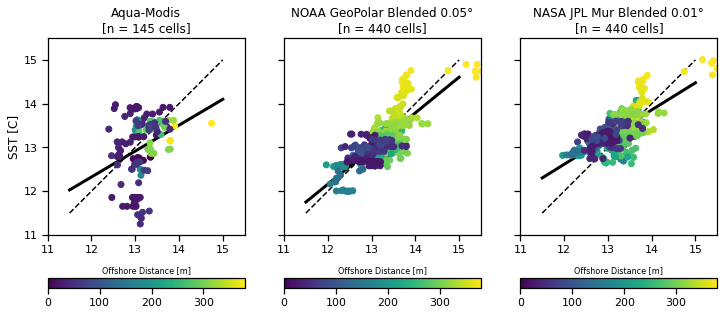

In [186]:
fig, (ax,ax2,ax3) = plt.subplots(ncols=3, sharex=True, sharey=True)
fig.set_size_inches(12,8)

cax = ax.scatter(df_top['temperature'],df_top['sst_mean_2k'],c=df_top['distance'])
fit = df_top[np.isfinite(df_top['sst_mean_2k'])]
m, b = np.polyfit(fit['temperature'],fit['sst_mean_2k'], 1)
ax.plot(x, m*x+b, color='k',lw=3,zorder=0)
clb = plt.colorbar(cax, ax=ax, location='bottom',pad=.1)
clb.ax.set_title('Offshore Distance [m]',fontsize=8)


ax2.scatter(df_top['temperature'],df_top['sst_mean'],c=df_top['distance'])
m, b = np.polyfit(df_top['temperature'],df_top['sst_mean'], 1)
ax2.plot(x, m*x+b, color='k',lw=3,zorder=0)
clb = plt.colorbar(cax, ax=ax2, location='bottom',pad=.1)
clb.ax.set_title('Offshore Distance [m]',fontsize=8)



ax3.scatter(df_top['temperature'],df_top['sst_mean_MUR'],c=df_top['distance'])
m, b = np.polyfit(df_top['temperature'],df_top['sst_mean_MUR'], 1)
ax3.plot(x, m*x+b, color='k',lw=3,zorder=0)
clb = plt.colorbar(cax, ax=ax3, location='bottom',pad=.1)
clb.ax.set_title('Offshore Distance [m]',fontsize=8)



ax.set_title("Aqua-Modis\n[n = 145 cells]")
ax2.set_title("NOAA GeoPolar Blended 0.05°\n[n = 440 cells]")
ax3.set_title("NASA JPL Mur Blended 0.01°\n[n = 440 cells]")

ax.set_ylabel("SST [C]")
# ax2.set_ylabel("Analyzed SST [C]")
# ax3.set_ylabel("Analyzed SST [C]")
# ax2.set_xlabel('Glider near-surface Temperature [C]')


for axes in [ax,ax2,ax3]:
    axes.set_aspect('equal')
    axes.set_xlim(11,15.5)
    axes.set_ylim(11,15.5)
    x = np.linspace(11.5,15)
    axes.plot(x,x,ls='dashed',zorder=-1, color='k')
    axes.text
plt.subplots_adjust(wspace=0.2)
plt.savefig('./figures/temp_scatter.png',dpi=300)

## Difference Map ##

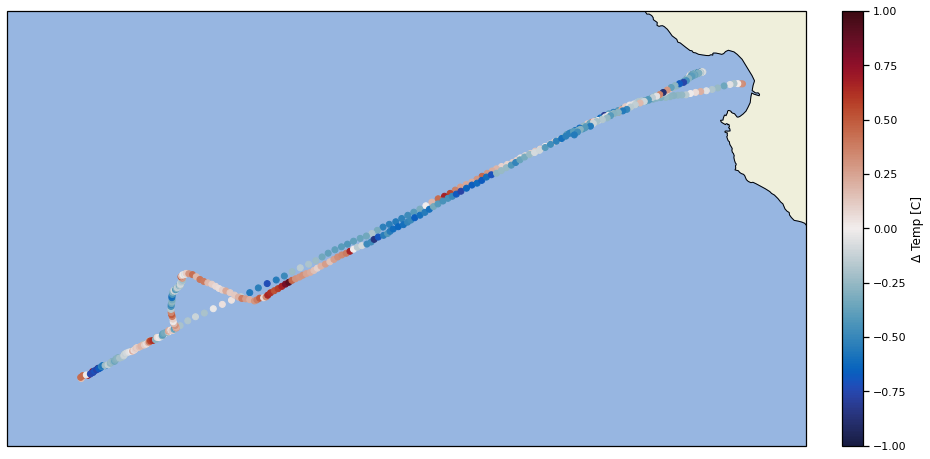

In [251]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
fig.set_size_inches(16,8)


ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
cax = ax.scatter(df_top['longitude'], df_top['latitude'],c=(df_top['temperature'] - df_top['sst_mean_MUR']),cmap=cmocean.cm.balance,vmin=-1,vmax=1)
ax.set_xlim(-126,-121.5)
ax.set_ylim(34.75,37.2)
clb = plt.colorbar(cax,location='right', fraction=0.046, pad=0.04,label='Δ Temp [C]')
plt.savefig('./figures/temp_diff_map_MUR.png',dpi=300)

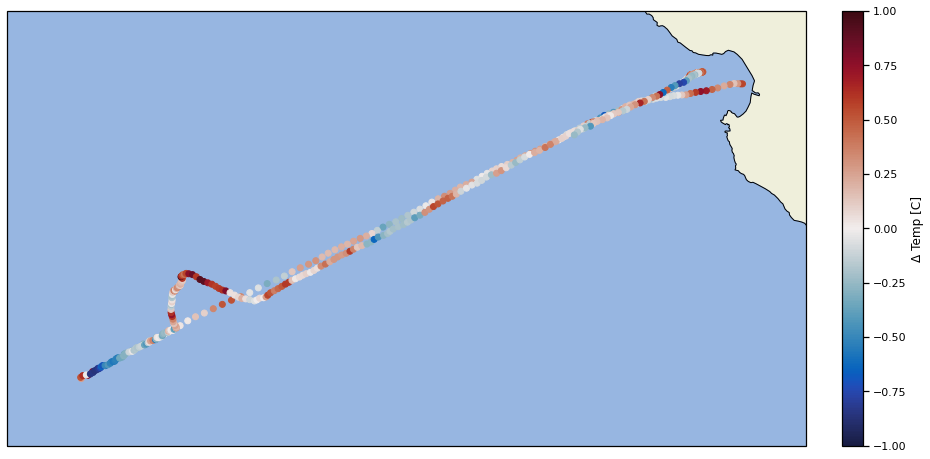

In [230]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
fig.set_size_inches(16,8)


ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
cax = ax.scatter(df_top['longitude'], df_top['latitude'],c=(df_top['temperature'] - df_top['sst_mean']),cmap=cmocean.cm.balance,vmin=-1,vmax=1)
ax.set_xlim(-126,-121.5)
ax.set_ylim(34.75,37.2)
clb = plt.colorbar(cax,location='right', fraction=0.046, pad=0.04,label='Δ Temp [C]')
plt.savefig('./figures/temp_diff_map_geo.png',dpi=300)